## Sanity check modelling

This notebook is used to test the accuracy of population simulation. The idea is that if I can make classifier models to find the four casts based on the numerical variables, then they are simulated in a correct way. 

In [8]:
from simulate_population import PopulationSampleGenerator
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.cluster import KMeans, DBSCAN

### Create a sample population dataframe

In [2]:
def generateSample():
    casts = ['1st', '2nd', '3rd', '4th']
    sim1, sim2, sim3, sim4 = PopulationSampleGenerator('1st'), PopulationSampleGenerator('2nd'), PopulationSampleGenerator('3rd'), PopulationSampleGenerator('4th')
    df1, df2, df3, df4 = sim1.createSample(), sim2.createSample(), sim3.createSample(), sim4.createSample() #generate samples for the casts
    df1['cast'], df2['cast'], df3['cast'], df4['cast'] = casts[0], casts[1], casts[2], casts[3] 
    population_sample = pd.concat([df1, df2, df3, df4], ignore_index=True)
    population_sample = population_sample.sample(frac=1)
    return population_sample

### KNN algorithm for predicting which cast a random citizen belongs to

In [ ]:
df = generateSample()

In [22]:
y = df['cast']
X = df[['age', 'sex', 'income', 'education']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=13)

train_acc = []
test_acc = []

for k in range(2, 21):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    training_score = knn.score(X_train, y_train)
    test_score = knn.score(X_test, y_test)
    train_acc.append(training_score)
    test_acc.append(test_score)

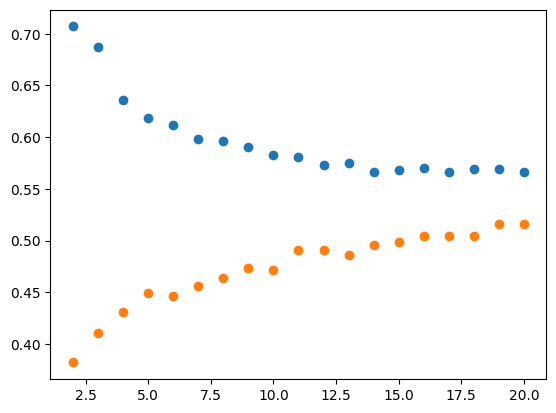

In [23]:
plt.scatter(x=list(range(2, 21)), y=train_acc)
plt.scatter(x=list(range(2, 21)), y=test_acc)
    

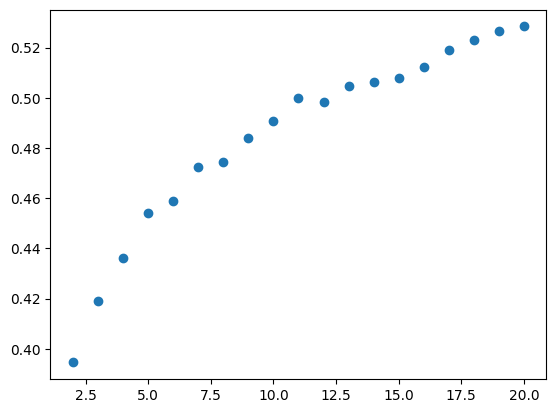

In [26]:
# knn but with cross validation
y = df['cast']
X = df[['age', 'sex', 'income', 'education']]
train_acc = []
test_acc = []

for k in range(2, 21):
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X, y, cv=10)
    test_acc.append(np.mean(scores))

plt.scatter(x=list(range(2, 21)), y=test_acc)

### Linear Regression and Random Forest Regression to predict income based on other variables for citizens

## K-mean clustering to see how effectively it finds the four casts

In [3]:
df = generateSample()

In [36]:
X = df[['age', 'sex', 'income', 'education']]
kmeans = KMeans(n_clusters=4, n_init='auto', random_state=13)
kmeans.fit(X)
clusters = kmeans.labels_
df['kmeans'] = clusters
df.head()

fil1 = df[df['kmeans'] == 0]
fil2 = df[df['kmeans'] == 1]
fil3 = df[df['kmeans'] == 2]
fil4 = df[df['kmeans'] == 3]

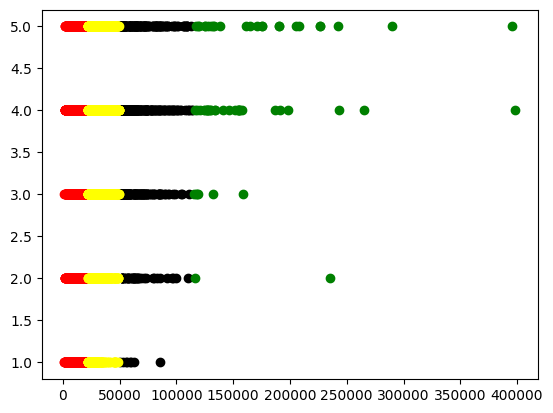

In [37]:
plt.scatter(x=fil1['income'], y=fil1['education'], color='red')
plt.scatter(x=fil2['income'], y=fil2['education'], color='black')
plt.scatter(x=fil3['income'], y=fil3['education'], color='yellow')
plt.scatter(x=fil4['income'], y=fil4['education'], color='green')

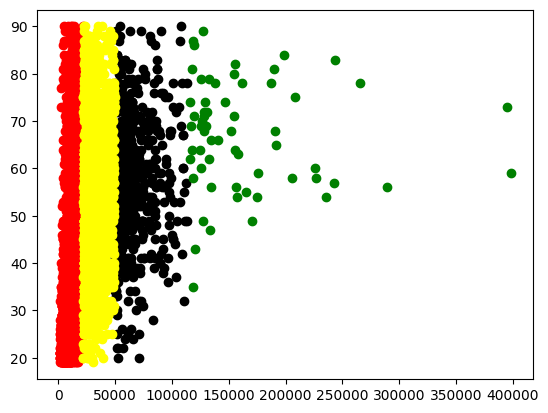

In [38]:
plt.scatter(x=fil1['income'], y=fil1['age'], color='red')
plt.scatter(x=fil2['income'], y=fil2['age'], color='black')
plt.scatter(x=fil3['income'], y=fil3['age'], color='yellow')
plt.scatter(x=fil4['income'], y=fil4['age'], color='green')

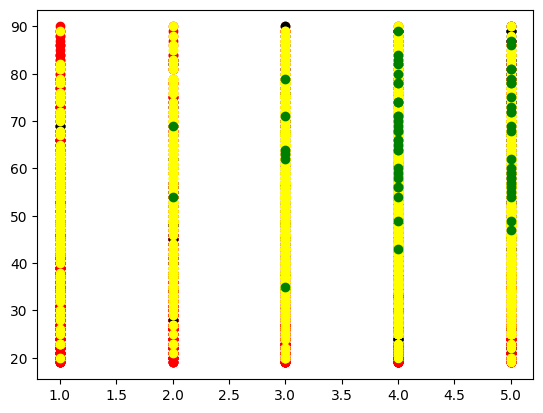

In [39]:
plt.scatter(x=fil1['education'], y=fil1['age'], color='red')
plt.scatter(x=fil2['education'], y=fil2['age'], color='black')
plt.scatter(x=fil3['education'], y=fil3['age'], color='yellow')
plt.scatter(x=fil4['education'], y=fil4['age'], color='green')